In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#%%capture
#!wget -N https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
#!unzip -o /content/dogImages.zip
#!mv /content/dogImages /content/drive/My\ Drive/dog-breeds/dog_images

# Configuration & utilities

Here we define the configuration parameters, dependencies and utility functions needed for the experiment. You may only need to specify the 'experiment_description' value in the first line of code, and the paths identifying the project and the different datasets. 

In [3]:
import numpy as np
from glob import glob
import sys

experiment_description = 'best_scenario_replay'
project_path = '/content/drive/My Drive/dog-breeds/'

##################### DO NOT MODIFY ################################

experiment_location = project_path + experiment_description
escaped_exp_location = experiment_location.replace(" ", "\\ ")
!mkdir $escaped_exp_location
model_file = experiment_location + '/model_ ' + experiment_description
output_file = experiment_location + '/' + experiment_description
sys.path.append(project_path)
##################### END: DO NOT MODIFY ###########################

dog_files = np.array(glob(project_path + "dog_images/*/*/*"))
print('There are %d total dog images.' % len(dog_files))
train_path = project_path + 'dog_images/train'
validation_path = project_path +'dog_images/valid'
test_path = project_path +'dog_images/test'


def print_gpu():
  gpu_info = !nvidia-smi
  gpu_info = '\n'.join(gpu_info)
  if gpu_info.find('failed') >= 0:
    print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
  else:
    print(gpu_info) 

There are 8351 total dog images.


# Experiment

A lot of things here need to be separated:

 - Creation of dataset loaders
 - NN architecture
 - Hyperparameter dictionaries
 - Testing and Rebooting functions
 - Experiment loop
 - Visualization

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2_x): Sequential(
    (0): BasicBlock(
      (residual_function): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (residual_function): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

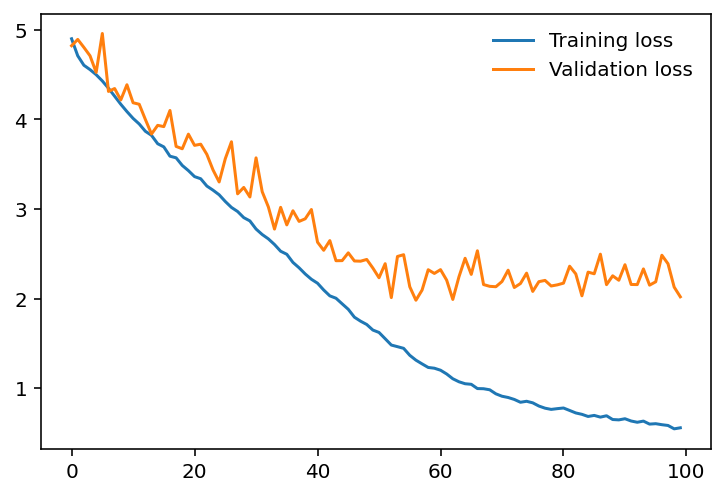

Test Loss: 2.016611

Test Accuracy: 49% (414/836)




In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from utils.preprocess import *
from utils.resnet_model import *
from utils.train import *
from utils.simple_model import *
import torch.optim as optim
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

sometimes = lambda aug: iaa.Sometimes(0.5, aug)

augmentations = [
        [
        sometimes(iaa.Crop(percent=(0, 0.45))),
        iaa.Add((-10, 10), per_channel=0.5)
        ]
]
learning_rates = [
                 0.0015
                 ]
optimizers = [
             optim.Adam
             ]
models = [
         resnet18()
         ]
         
paths = {
    'train_path' : train_path,
    'validation_path' : validation_path,
    'test_path' : test_path
}


hyperparameters_dictionary = {
    'augmentations' : augmentations,
    'learning_rates' : learning_rates,
    'epochs' : 100,
    'optimizers' : optimizers,
    'models' : models
}

print_gpu()
run_experiments(paths, hyperparameters_dictionary, model_file)


